In [1]:
import pandas as pd
import numpy as np

In [9]:
df=pd.read_csv(r'C:\Ragavi Job\Skillovilla\Projects\Income Evaluation-imbalanced dataset\adult.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [10]:
col=['age','workclass','fnlwgt','education','education-num','marital_status','occupation','relationship','race','sex','capital gain','capital loss','hours per week','native country','income']
df.columns=col

In [11]:
df

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [12]:
df.shape

(16281, 15)

In [13]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital gain      0
capital loss      0
hours per week    0
native country    0
income            0
dtype: int64

In [16]:
df['occupation'].unique()

array([' Machine-op-inspct', ' Farming-fishing', ' Protective-serv', ' ?',
       ' Other-service', ' Prof-specialty', ' Craft-repair',
       ' Adm-clerical', ' Exec-managerial', ' Tech-support', ' Sales',
       ' Priv-house-serv', ' Transport-moving', ' Handlers-cleaners',
       ' Armed-Forces'], dtype=object)

In [17]:
df['education'].unique()

array([' 11th', ' HS-grad', ' Assoc-acdm', ' Some-college', ' 10th',
       ' Prof-school', ' 7th-8th', ' Bachelors', ' Masters', ' Doctorate',
       ' 5th-6th', ' Assoc-voc', ' 9th', ' 12th', ' 1st-4th',
       ' Preschool'], dtype=object)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital_status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital gain    16281 non-null  int64 
 11  capital loss    16281 non-null  int64 
 12  hours per week  16281 non-null  int64 
 13  native country  16281 non-null  object
 14  income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [20]:
df.columns[df.dtypes=='O']

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native country', 'income'],
      dtype='object')

In [39]:
col_edit=['workclass', 'education', 'marital_status', 'occupation','relationship', 'race', 'sex', 'native country', 'income']
for i in col_edit:
    df[i]=df[i].str.strip()

In [41]:
df.head()

,age,workclass,education,education-num,marital_status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [42]:
df.loc[df['occupation']=='?']

,age,workclass,education,education-num,marital_status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,income
4,18,NaN,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
6,29,NaN,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
13,58,NaN,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K.
22,72,NaN,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K.
35,65,NaN,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16121,61,NaN,Some-college,10,Married-civ-spouse,?,Husband,White,Male,0,0,14,United-States,<=50K.
16208,21,NaN,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
16239,73,NaN,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,Canada,<=50K.
16251,81,NaN,Assoc-voc,11,Married-civ-spouse,?,Husband,White,Male,2936,0,20,United-States,<=50K.


In [ ]:
996 records doesn't have information.Since this has huge amount of data i am replacing with Nan

In [58]:
df.loc[df['workclass']=='?','workclass']=np.NaN
df.loc[df['occupation']=='?','occupation']=np.NaN
df.loc[df['native country']=='?','native country']=np.NaN
df['race'].unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

<Axes: xlabel='income', ylabel='count'>

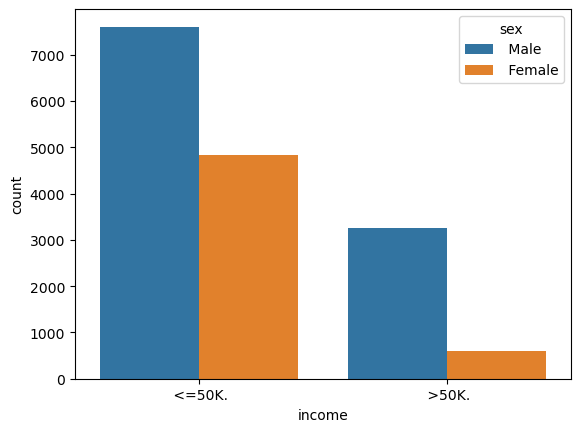

In [24]:
import seaborn as sns
sns.countplot(x='income',data=df,hue='sex')

In [ ]:
#male is earning high in both the scenario

In [25]:
df.drop(['fnlwgt'],axis=1,inplace=True)

<Axes: xlabel='income', ylabel='count'>

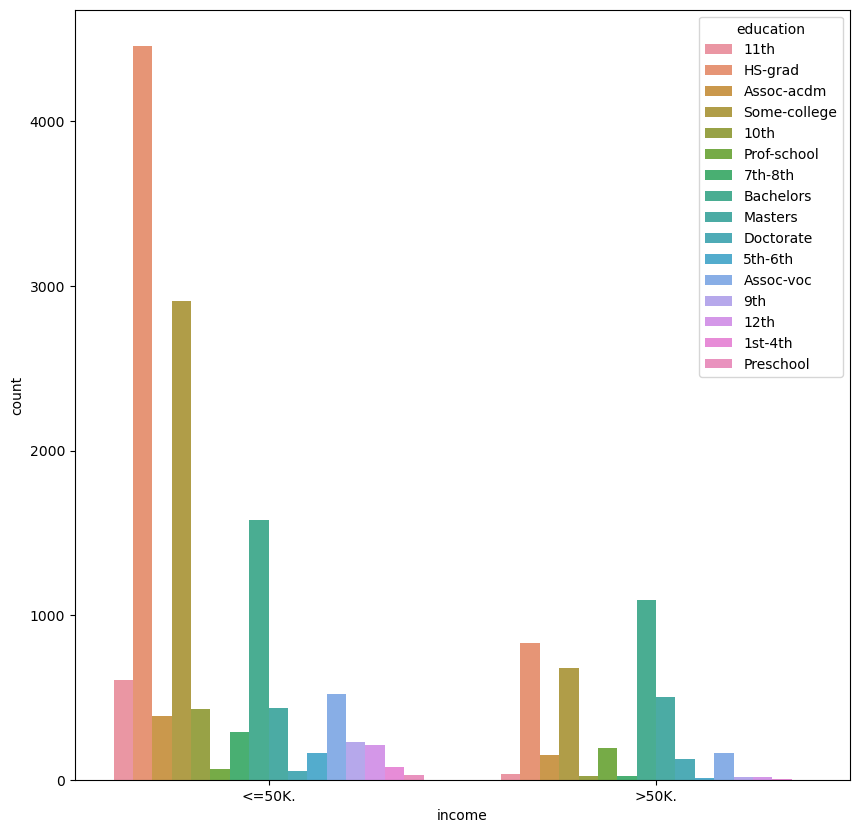

In [50]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,10))
sns.countplot(x='income',hue='education',data=df)

In [ ]:
most of the people earning below 50K have education of HS-grad and people with masters is earning more than 50k

<Axes: xlabel='income', ylabel='count'>

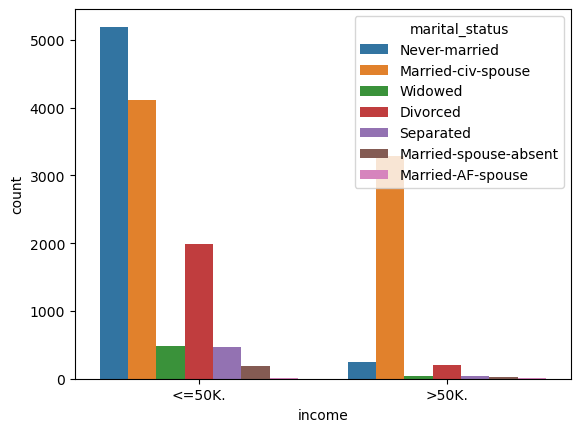

In [56]:
sns.countplot(x='income',hue='marital_status',data=df)

In [ ]:
married person is earning more

<Axes: xlabel='income', ylabel='count'>

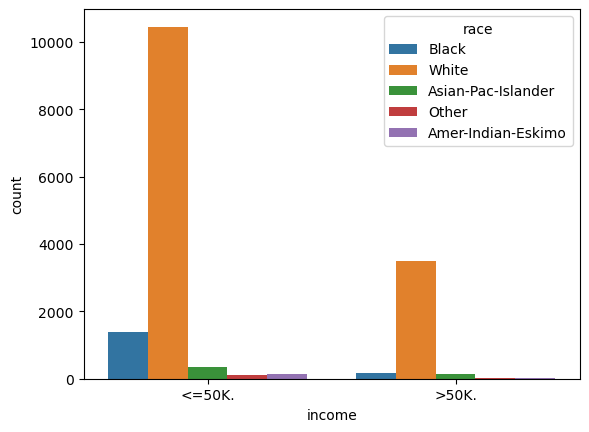

In [59]:
sns.countplot(x='income',hue='race',data=df)
#white earning more in both the category

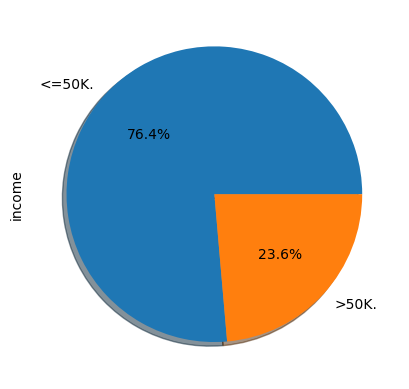

In [55]:
df['income'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',shadow=True)
plt.show()

In [ ]:
it seems data is imbalanced heavily.so model may become overfitted

In [62]:
df.corr()

C:\Users\Ragavi\AppData\Local\Temp\ipykernel_18784\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,education-num,capital gain,capital loss,hours per week
age,1.000000,0.019945,0.076377,0.055302,0.077058
education-num,0.019945,1.000000,0.130092,0.083077,0.134899
capital gain,0.076377,0.130092,1.000000,-0.031109,0.089390
capital loss,0.055302,0.083077,-0.031109,1.000000,0.054890
hours per week,0.077058,0.134899,0.089390,0.054890,1.000000


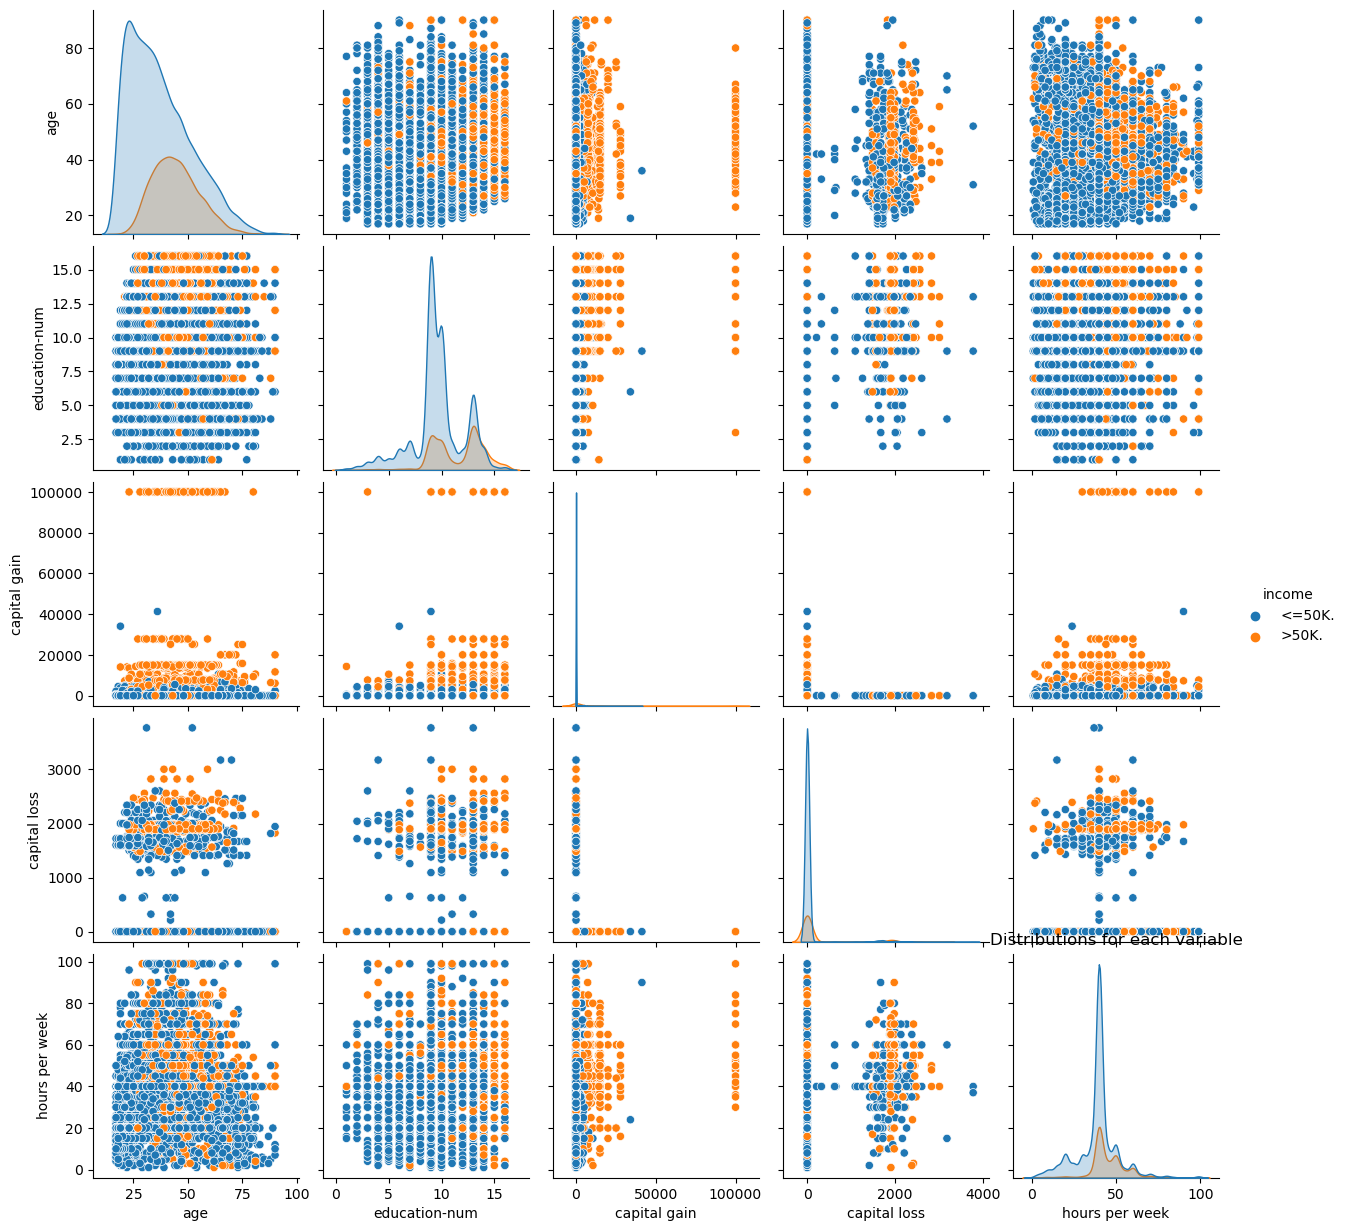

In [64]:
sns.pairplot(data=df, hue="income")
plt.title('Distributions for each variable')
plt.show()

In [67]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler



In [68]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital gain',
       'capital loss', 'hours per week', 'native country', 'income'],
      dtype='object')

In [71]:
label=['workclass','education','marital_status','occupation','relationship','race','sex','income','native country']
le=LabelEncoder()
for r in label:
    df[r]=le.fit_transform(df[r])
df.head()

,age,workclass,education,education-num,marital_status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,income
0,25,3,1,7,4,6,3,2,1,0,0,40,37,0
1,38,3,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,3,15,10,2,6,0,2,1,7688,0,40,37,1
4,18,8,15,10,4,14,3,4,0,0,0,30,37,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             16281 non-null  int64
 1   workclass       16281 non-null  int64
 2   education       16281 non-null  int64
 3   education-num   16281 non-null  int64
 4   marital_status  16281 non-null  int64
 5   occupation      16281 non-null  int64
 6   relationship    16281 non-null  int64
 7   race            16281 non-null  int64
 8   sex             16281 non-null  int64
 9   capital gain    16281 non-null  int64
 10  capital loss    16281 non-null  int64
 11  hours per week  16281 non-null  int64
 12  native country  16281 non-null  int32
 13  income          16281 non-null  int64
dtypes: int32(1), int64(13)
memory usage: 1.7 MB


In [74]:
sc=StandardScaler()
sc.fit(df.drop(['income'],axis=1))
sc.transform(df.drop(['income'],axis=1))

array([[-0.99412926, -0.2528865 , -2.38711634, ..., -0.21806206,
        -0.03143184,  0.2480116 ],
       [-0.05541716, -0.2528865 ,  0.1883042 , ..., -0.21806206,
         0.7699177 ,  0.2480116 ],
       [-0.77750339, -1.49902606, -0.84186402, ..., -0.21806206,
        -0.03143184,  0.2480116 ],
       ...,
       [-0.05541716, -0.2528865 , -0.32677991, ..., -0.21806206,
         0.7699177 ,  0.2480116 ],
       [ 0.37783458, -0.2528865 , -0.32677991, ..., -0.21806206,
        -0.03143184,  0.2480116 ],
       [-0.27204303,  0.37018328, -0.32677991, ..., -0.21806206,
         1.57126723,  0.2480116 ]])

# Handling Imbalanced data

In [75]:
from imblearn.combine import SMOTETomek


In [81]:
x=df.drop(['income'],axis=1)
y=df['income']
print("x:",x.shape)
print("y:",y.shape)

x: (16281, 13)
y: (16281,)


In [80]:
s=SMOTETomek(random_state=42)
x_res,y_res=s.fit_resample(x,y)
print("Oversampled x:",x_res.shape)
print("Oversampled y:",y_res.shape)

Oversampled x: (24404, 13)
Oversampled y: (24404,)


In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=42)
x_train.shape

(19523, 13)

In [83]:
x_test.shape

(4881, 13)

# Model Selection

In [84]:
from sklearn.ensemble import RandomForestClassifier


In [85]:
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
y_pred

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [91]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [87]:
acc=accuracy_score(y_pred,y_test)
acc

0.9049375128047531

In [88]:
report=classification_report(y_test,y_pred)
report

'              precision    recall  f1-score   support\n\n           0       0.92      0.88      0.90      2459\n           1       0.89      0.93      0.91      2422\n\n    accuracy                           0.90      4881\n   macro avg       0.91      0.91      0.90      4881\nweighted avg       0.91      0.90      0.90      4881\n'

In [92]:
confusion_matrix(y_test,y_pred)

array([[2173,  286],
       [ 178, 2244]], dtype=int64)